<a href="https://colab.research.google.com/github/SuyogBhatkhalkar/CustoerResponsePrediction_LogisticRegression/blob/main/LogisticRegressioCustomerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
gdrive = drive.mount('/content/drive/')
import os
os.listdir()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['.config', 'drive', 'sample_data']

In [10]:
#Import required libs here
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, classification_report
import pickle

In [11]:
#Read the input dataset features
dataset = pd.read_csv("drive/MyDrive/DataScienseStudyNotes/features2.csv")

In [12]:
# Drop first column ID 
input_features = dataset.drop(['ID'],axis=1)
#split data into X_train, Y_train 
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
# enumerate splits
features = next(kf.split(input_features))
print (features)
#(array([0, 2, 3, 5, 6, 7, 8, 9]), array([1, 4]))

train = input_features.iloc[features[0]]
test =  input_features.iloc[features[1]]
train.head(10)

(array([    0,     1,     3, ..., 24301, 24302, 24304]), array([    2,     8,    11, ..., 24285, 24295, 24303]))


,age,duration,campaign,pdays,default_yes,housing_yes,loan_yes,month_apr,month_aug,month_dec,...,job_new_technician,job_new_unemployed,education_new_basic.9y,education_new_high.school,education_new_professional.course,education_new_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,0.270270,0.041074,0.023810,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.824324,0.233428,0.000000,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,0.567568,0.074827,0.023810,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.162162,0.052054,0.023810,1.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5,0.121622,0.091297,0.000000,1.0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,1
6,0.175676,0.025620,0.023810,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0.216216,0.101261,0.095238,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0.202703,0.018910,0.095238,1.0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
10,0.121622,0.014437,0.000000,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
12,0.527027,0.075030,0.000000,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [13]:
#seperate target variable and independent variables from train data and test datasets
train_y = train['y_yes']
train_x =  train.drop(['y_yes'],axis=1)
test_y = test['y_yes']
test_x = test.drop(['y_yes'],axis=1)

In [14]:
train_y.head()

0    0
1    1
3    0
4    0
5    1
Name: y_yes, dtype: int64

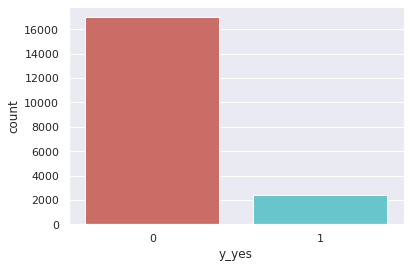

In [15]:
#plot historgram for each column to check how the balance the input data and target variable is
import matplotlib.pyplot as plt
import seaborn as sns
y_train_df = pd.DataFrame(train_y)
y_train_df.head()
sns.set()
#plt.figure()
sns.countplot(x='y_yes', data=y_train_df, palette = 'hls')
plt.show()

In [16]:
#as we have imbalance dataset, let us apply SMOTE to generate balance data
print('Before OverSampling, the shape of train_X: {}'.format(train_x.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(train_y.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
train_x_res, train_y_res = sm.fit_resample(train_x, train_y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(train_x.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(train_y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(train_y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(train_y_res == 0)))

Before OverSampling, the shape of train_X: (19444, 37)
Before OverSampling, the shape of train_y: (19444,) 

Before OverSampling, counts of label '1': 2443
Before OverSampling, counts of label '0': 17001
After OverSampling, the shape of train_X: (19444, 37)
After OverSampling, the shape of train_y: (19444,) 

After OverSampling, counts of label '1': 17001
After OverSampling, counts of label '0': 17001


After applying SMOTE data looks more balanced as eblow: 


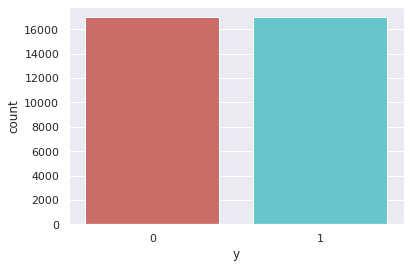

In [17]:
#plot historgram for each column to check how the balance the input data and target variable is
import matplotlib.pyplot as plt
import seaborn as sns
y_train_df = pd.DataFrame(data=train_y_res,columns=['y'])
y_train_df.head()
sns.set()
#plt.figure()
sns.countplot(x='y', data=y_train_df, palette = 'hls')
plt.show()

Now let us apply the logistic regression model on the data.

In [18]:
logreg = LogisticRegression()
model = logreg.fit(train_x_res, train_y_res)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
pick_insert = open('drive/MyDrive/DataScienseStudyNotes/logistic_regression_model.pickle','wb')
pickle.dump(model,  pick_insert)
pick_insert.close()

In [20]:
y_pred = logreg.predict(test_x )
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x , test_y)))

Accuracy of logistic regression classifier on test set: 0.87


In [21]:
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)
print(classification_report(test_y, y_pred))

[[3874  362]
 [ 253  372]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4236
           1       0.51      0.60      0.55       625

    accuracy                           0.87      4861
   macro avg       0.72      0.75      0.74      4861
weighted avg       0.88      0.87      0.88      4861



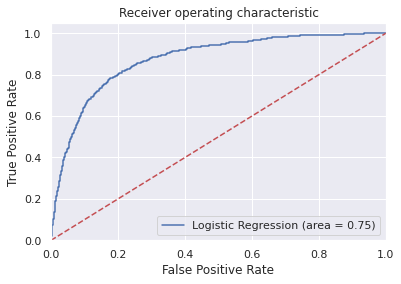

In [22]:
logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [23]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.873754
